# sklearn
This is a machine learning library.

## Standard Setup

In [220]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; margin-left:350px; }</style>"))
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
pd.set_option( 'display.notebook_repr_html', False)  # render Series and DataFrame as text, not HTML
pd.set_option( 'display.max_column', 10)    # number of columns
pd.set_option( 'display.max_rows', 10)     # number of rows
pd.set_option( 'display.width', 90)        # number of characters per row

## The Library
sklearn **does not automatically import its subpackages**. Therefore all subpakcages must be specifically loaded before use.

In [252]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model    import LinearRegression
from sklearn.pipeline        import make_pipeline
from sklearn.preprocessing   import Imputer
#from sklearn.preprocessing   import PolynomialFeatures
from sklearn.metrics         import *
import statsmodels.formula.api as smf



In [139]:
n = 100  # number of samples
I = 5  # intercept value
E = np.random.randint( 1,20, n)  # Error
X1 = np.random.randint( 1,n+1, n)
X2 = np.random.randint( 1,n+1, n)
X3 = np.random.randint( 1,n+1, n)
Y = 0.1*X1 + 0.2*X2 + 0.3*X3 + E + I
mydf = pd.DataFrame({
    'Y':Y,
    'X1':X1,
    'X2':X2,
    'X3':X3
})
mydf.shape

(100, 4)

In [140]:
mydf.head()

   X1  X2  X3     Y
0  35  77  75  50.4
1  98  75  82  60.4
2  21  84  21  40.2
3  15  39  66  44.1
4  55   2  71  35.2

## Data Splitting

### Sample Data
Generate 100 rows of data, with 3x features (X1,X2,X3), and one dependant variable (Y)

### Method 1: Split One Dataframe Into Train/Test

```
traindf, testdf = train_test_split( df, test_size=, random_state= ) 
 # random_state : seed number (integer), optional
 # test_size    : fraction of 1, 0.2 means 20%
```

In [141]:
traindf, testdf = train_test_split(mydf,test_size=0.2, random_state=25)

In [142]:
print (len(traindf))
print (len(testdf))

80
20


### Method 2: DataFrame in X,Y, split into x_train/test, y_train/test
```
x_train, x_test, y_train, y_test = train_test_split( X,Y, test_size=, random_state= )
 # random_state : seed number (integer), optional
 # test_size    : fraction of 1, 0.2 means 20%
```

**Split DataFrame into X and Y First**

In [143]:
feature_cols = ['X1','X2','X3']
X = mydf[feature_cols]
Y = mydf.Y

**Then Split X/Y into x_train/test, y_train/test**

In [144]:
x_train, x_test, y_train, y_test = train_test_split( X,Y, test_size=0.2, random_state=25)
print (len(x_train))
print (len(x_test))

80
20


## Polynomial Transform
This can be used as part of feature engineering, to introduce new features for data that seems to fit with quadradic model.

### Single Variable

#### Sample Data
Data must be 2-D before polynomial features can be applied. Code below convert 1D array into 2D array.

In [227]:
x = np.array([1, 2, 3, 4, 5])
X = x[:,np.newaxis]
X

array([[1],
       [2],
       [3],
       [4],
       [5]])

#### Degree 1
One Degree means maintain original features. No new features is created.

In [205]:
PolynomialFeatures(degree=1, include_bias=False).fit_transform(X)

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.]])

#### Degree 2
A new feature is created, with **x^2** of original feature

In [206]:
PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)

array([[  1.,   1.],
       [  2.,   4.],
       [  3.,   9.],
       [  4.,  16.],
       [  5.,  25.]])

#### Degree 3
On top of degree two, another new feature **(x^3)** is created with interaction between two features in degree-2

In [207]:
PolynomialFeatures(degree=3, include_bias=False).fit_transform(X)

array([[   1.,    1.,    1.],
       [   2.,    4.,    8.],
       [   3.,    9.,   27.],
       [   4.,   16.,   64.],
       [   5.,   25.,  125.]])

#### Degree 4

In [208]:
PolynomialFeatures(degree=4, include_bias=False).fit_transform(X)

array([[   1.,    1.,    1.,    1.],
       [   2.,    4.,    8.,   16.],
       [   3.,    9.,   27.,   81.],
       [   4.,   16.,   64.,  256.],
       [   5.,   25.,  125.,  625.]])

### Two Variables

#### Sample Data

In [216]:
X = pd.DataFrame( {'x1': [1, 2, 3, 4, 5 ],
                   'x2': [6, 7, 8, 9, 10]})
X

   x1  x2
0   1   6
1   2   7
2   3   8
3   4   9
4   5  10

#### Degree 2
```
Degree-1 original   features:  x1,     x2  
Degree-2 additional features:  x1^2,   x2^2,   x1:x2 
```

In [218]:
PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)

array([[   1.,    6.,    1.,    6.,   36.],
       [   2.,    7.,    4.,   14.,   49.],
       [   3.,    8.,    9.,   24.,   64.],
       [   4.,    9.,   16.,   36.,   81.],
       [   5.,   10.,   25.,   50.,  100.]])

#### Degree 3
```
Degree-1 original   features:  x1,       x2  
Degree-2 additional features:  x1^2,     x2^2,   x1:x2 
Degree-3 additional features:  x1^3,     x2^3    x1:x2^2    x2:x1^2
```

In [223]:
PolynomialFeatures(degree=3, include_bias=False).fit_transform(X)

array([[    1.,     6.,     1.,     6.,    36.,     1.,     6.,    36.,
          216.],
       [    2.,     7.,     4.,    14.,    49.,     8.,    28.,    98.,
          343.],
       [    3.,     8.,     9.,    24.,    64.,    27.,    72.,   192.,
          512.],
       [    4.,     9.,    16.,    36.,    81.,    64.,   144.,   324.,
          729.],
       [    5.,    10.,    25.,    50.,   100.,   125.,   250.,   500.,
         1000.]])

## Imputation of Missing Data

### Sample Data

In [253]:
from numpy import nan
X = np.array([[ nan, 0,   3  ],
              [ 3,   7,   9  ],
              [ 3,   5,   2  ],
              [ 4,   nan, 6  ],
              [ 8,   8,   1  ]])

y = np.array([14, 16, -1,  8, -5])

In [256]:
imp = Imputer(strategy='mean')
X2 = imp.fit_transform(X)
X2

array([[ 4.5,  0. ,  3. ],
       [ 3. ,  7. ,  9. ],
       [ 3. ,  5. ,  2. ],
       [ 4. ,  5. ,  6. ],
       [ 8. ,  8. ,  1. ]])

In [255]:
y

array([14, 16, -1,  8, -5])

## Pipeline

With any of the preceding examples, it can quickly become tedious to do the transformations by hand, especially if you wish to string together multiple steps. For example, we might want a processing pipeline that looks something like this:

- Impute missing values using the mean  
- Transform features to quadratic  
- Fit a linear regression  

In [258]:
from sklearn.pipeline import make_pipeline

my_model = make_pipeline (Imputer(strategy='mean'),
                          PolynomialFeatures(degree=2),
                          LinearRegression())

In [262]:
my_model.fit( X, y)
print (y)
print (my_model.predict(X))

[14 16 -1  8 -5]
[ 14.  16.  -1.   8.  -5.]


# Linear Regression

## The Library

In [145]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model    import LinearRegression
from sklearn.metrics        import mean_absolute_error, mean_squared_error
import statsmodels.api   as sm

## The Math

## Sample Data

### Data Emulation

In [146]:
n = 200  # number of samples
I = 250  # intercept value
E = np.random.randint( 1,20, n)  # Error
X1 = np.random.randint( 1,n+1, n)
X2 = np.random.randint( 1,n+1, n)
X3 = np.random.randint( 1,n+1, n)
Y = 0.1*X1 + 0.2*X2 + 0.3*X3 + E + I

**Put All Data In pandas DataFrame**

In [147]:
mydf = pd.DataFrame({
    'Y':Y,
    'X1':X1,
    'X2':X2,
    'X3':X3
})
mydf.head()

    X1   X2   X3      Y
0   29    7  148  309.7
1  129  119    2  303.3
2   41  180   65  316.6
3   39   31  142  319.7
4  140    5   63  290.9

### Data Validation

Ensure there is **no col-linearity** among the features used

#### Colleration Check

In [148]:
X.corr()

          X1        X2        X3
X1  1.000000 -0.024652  0.067517
X2 -0.024652  1.000000 -0.075579
X3  0.067517 -0.075579  1.000000

#### Matrix Scatter Plot

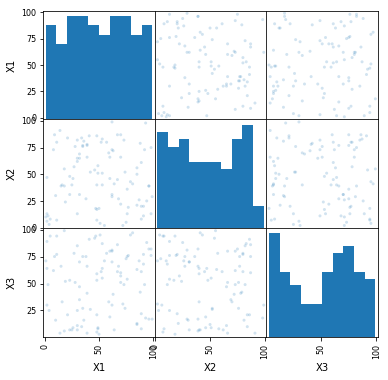

In [149]:
pd.plotting.scatter_matrix(X, alpha=0.2, figsize=(6, 6), diagonal='hist');

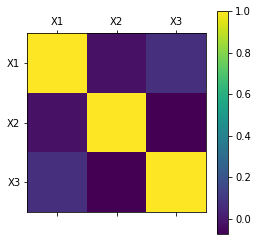

In [150]:
plt.matshow(X.corr())
plt.xticks(range(len(X.columns)), X.columns)
plt.yticks(range(len(X.columns)), X.columns)
plt.colorbar()
plt.show()

## Modeling (scikit-learn)

### Data Preparation

#### Preparing Features and Dependent Value

In [151]:
feature_cols = ['X1','X2','X3']
X = mydf[feature_cols]
Y = mydf.Y

#### Splitting Data Into Training and Test Sets

In [152]:
trainX,testX,trainY,testY = train_test_split(X,Y,test_size=0.2)

### Create The Model

In [153]:
lm = LinearRegression()   # create linear regression object
lm.fit( trainX, trainY )  # train the model using training set

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Analyze The Model
#### Intercept

In [154]:
lm.intercept_

261.11757538081633

#### Coef

In [155]:
lm.coef_

array([ 0.09926058,  0.19273555,  0.29905033])

In [156]:
pd.DataFrame(list(zip(X.columns, lm.coef_)), columns=['features','coef'] )

  features      coef
0       X1  0.099261
1       X2  0.192736
2       X3  0.299050

#### R-Squared

In [157]:
predTrain = lm.predict( trainX )

In [158]:
r2_score( trainY, predTrain )

0.93862125170693844

### Model Performance
#### Run Prediction On Train Data

In [159]:
trainPred = lm.predict( trainX )

#### Mean Absolute Error (MAE)

In [160]:
mean_absolute_error( trainY, trainPred )

4.658760498636239

#### Mean Squared Error (MSE)

In [161]:
mean_squared_error( trainY, trainPred )

28.976400598576653

#### Root Mean Squared Error (RMSE)

In [162]:
math.sqrt( mean_squared_error( trainY, trainPred ) )

5.382973211764726

### Test Prediction

In [163]:
testPred = lm.predict( testX )

In [164]:
mean_absolute_error( testY, testPred )

5.2757850327323528

In [165]:
mean_squared_error( testY, testPred )

34.080300824731793

In [166]:
math.sqrt( mean_squared_error( testY, testPred ) )

5.837833572887445

## Modeling (statsmodel)

### Data Preparation
Splitting data into training set and testing set.

In [167]:
traindf, testdf = train_test_split(mydf, test_size=0.2)
trainX,testX,trainY,testY = train_test_split(X,Y,test_size=0.2)

### Create The Model - Equation Method

In [168]:
fit = smf.ols(formula='Y ~ X1 + X2 + X3', data=traindf).fit()

#### Analyze The Model

In [169]:
print (fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     678.4
Date:                Sun, 11 Mar 2018   Prob (F-statistic):           2.99e-89
Time:                        10:49:41   Log-Likelihood:                -499.59
No. Observations:                 160   AIC:                             1007.
Df Residuals:                     156   BIC:                             1019.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    261.6789      1.409    185.685      0.0

### Create The Model - Array Method
**intercept** is not included in OLS modeling by default. Hence need to use add_constant() to training dataset in order to display intercept estimate.

In [170]:
trainX = sm.add_constant(trainX)     # this add new column of all value 1
fit2 = smf.OLS(trainY, trainX).fit()

#### Analyze The Model

In [171]:
print (fit2.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     738.5
Date:                Sun, 11 Mar 2018   Prob (F-statistic):           6.31e-92
Time:                        10:49:41   Log-Likelihood:                -501.93
No. Observations:                 160   AIC:                             1012.
Df Residuals:                     156   BIC:                             1024.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        261.1802      1.410    185.275      0.0

In [232]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
2*x+1

array([  9.34044009,  15.40648987,   1.0022875 ,   7.04665145,
         3.93511782,   2.8467719 ,   4.72520423,   7.91121454,
         8.93534948,  11.77633468,   9.38389029,  14.70439001,
         5.08904499,  18.56234873,   1.54775186,  14.4093502 ,
         9.34609605,  12.17379657,   3.80773877,   4.96202978,
        17.01489137,  20.36523151,   7.26848356,  14.84645231,
        18.52778305,  18.89213327,   2.70088423,   1.78109566,
         4.39660839,  18.56285007,   2.96693668,   9.4221525 ,
        20.1577906 ,  11.6633057 ,  14.83754228,   7.31031262,
        14.73001855,  17.69251344,   1.36576555,  16.0028863 ,
        20.77722178,  15.96331309,   6.60887984,  16.78558657,
         3.06452013,   9.95787052,  19.17191006,   6.87228297,
         6.75550677,   3.60057144])

## Examples

### Example 1 - Linear Regression

#### Sample Data
Plot looks like polynomial.

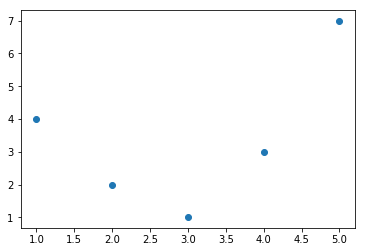

In [238]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
plt.scatter(x, y);

#### Built The Model

**Prepare The Data**  
X needs to be at least 2D. Increase the dimension with newaxis

In [239]:
X = x[:, np.newaxis]
X

array([[1],
       [2],
       [3],
       [4],
       [5]])

**Fit and Predict**

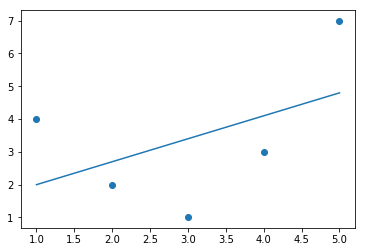

In [240]:
fit = LinearRegression().fit(X, y)
pred = fit.predict(X)
plt.scatter(x, y)
plt.plot(x,pred)

### Example 2 - Linear Regression with Polynomial Basis Functions

#### Sample Data

In [ ]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
plt.scatter(x, y);

#### Clean Method - Use Pipeline
This method **avoid manually** creating engineered features.

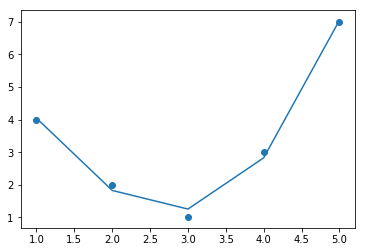

In [247]:
poly_model = make_pipeline( PolynomialFeatures(3), LinearRegression())
poly_model.fit( X,y)
pred2 = poly_model.predict(X)
## plot
plt.scatter(x, y)
plt.plot(x,pred2)

#### Alternative Method - Use Transform
This method involve create a PolynomialFeatures object, transform original data (X) with more engineered features according to degree chosen.

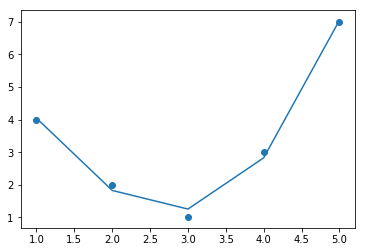

In [246]:
poly = PolynomialFeatures(degree=3, include_bias=False)
X2 = poly.fit_transform(X)
fit2 = LinearRegression().fit(X2, y)
pred2 = fit2.predict(X2)
## plot
plt.scatter(x, y)
plt.plot(x,pred2)

## Feature Selection

The advantage of using skcikit-learn package is that it has this particular method selection, works more or less like backward selection (not exactly), and is called **Recursive Feature**. How it works:

- Model run with all variables, weight is assigned to each variable
- Variable with smallest weight will be pruned from next iteration
- Run the model again till the number of desired features is left

### The Library

In [115]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

In [116]:
estimator = SVR(kernel='linear')       # we are using linear model
selector = RFE (estimator, 2, step=1)  # we want just 2 features
selector = selector.fit(X,Y)           # execute

In [117]:
selector.support_

array([False,  True,  True], dtype=bool)

In [118]:
selector.ranking_

array([2, 1, 1])

In [119]:
selector.estimator_

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)